<a href="https://colab.research.google.com/github/Janphadpu/puak/blob/main/styleformer_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

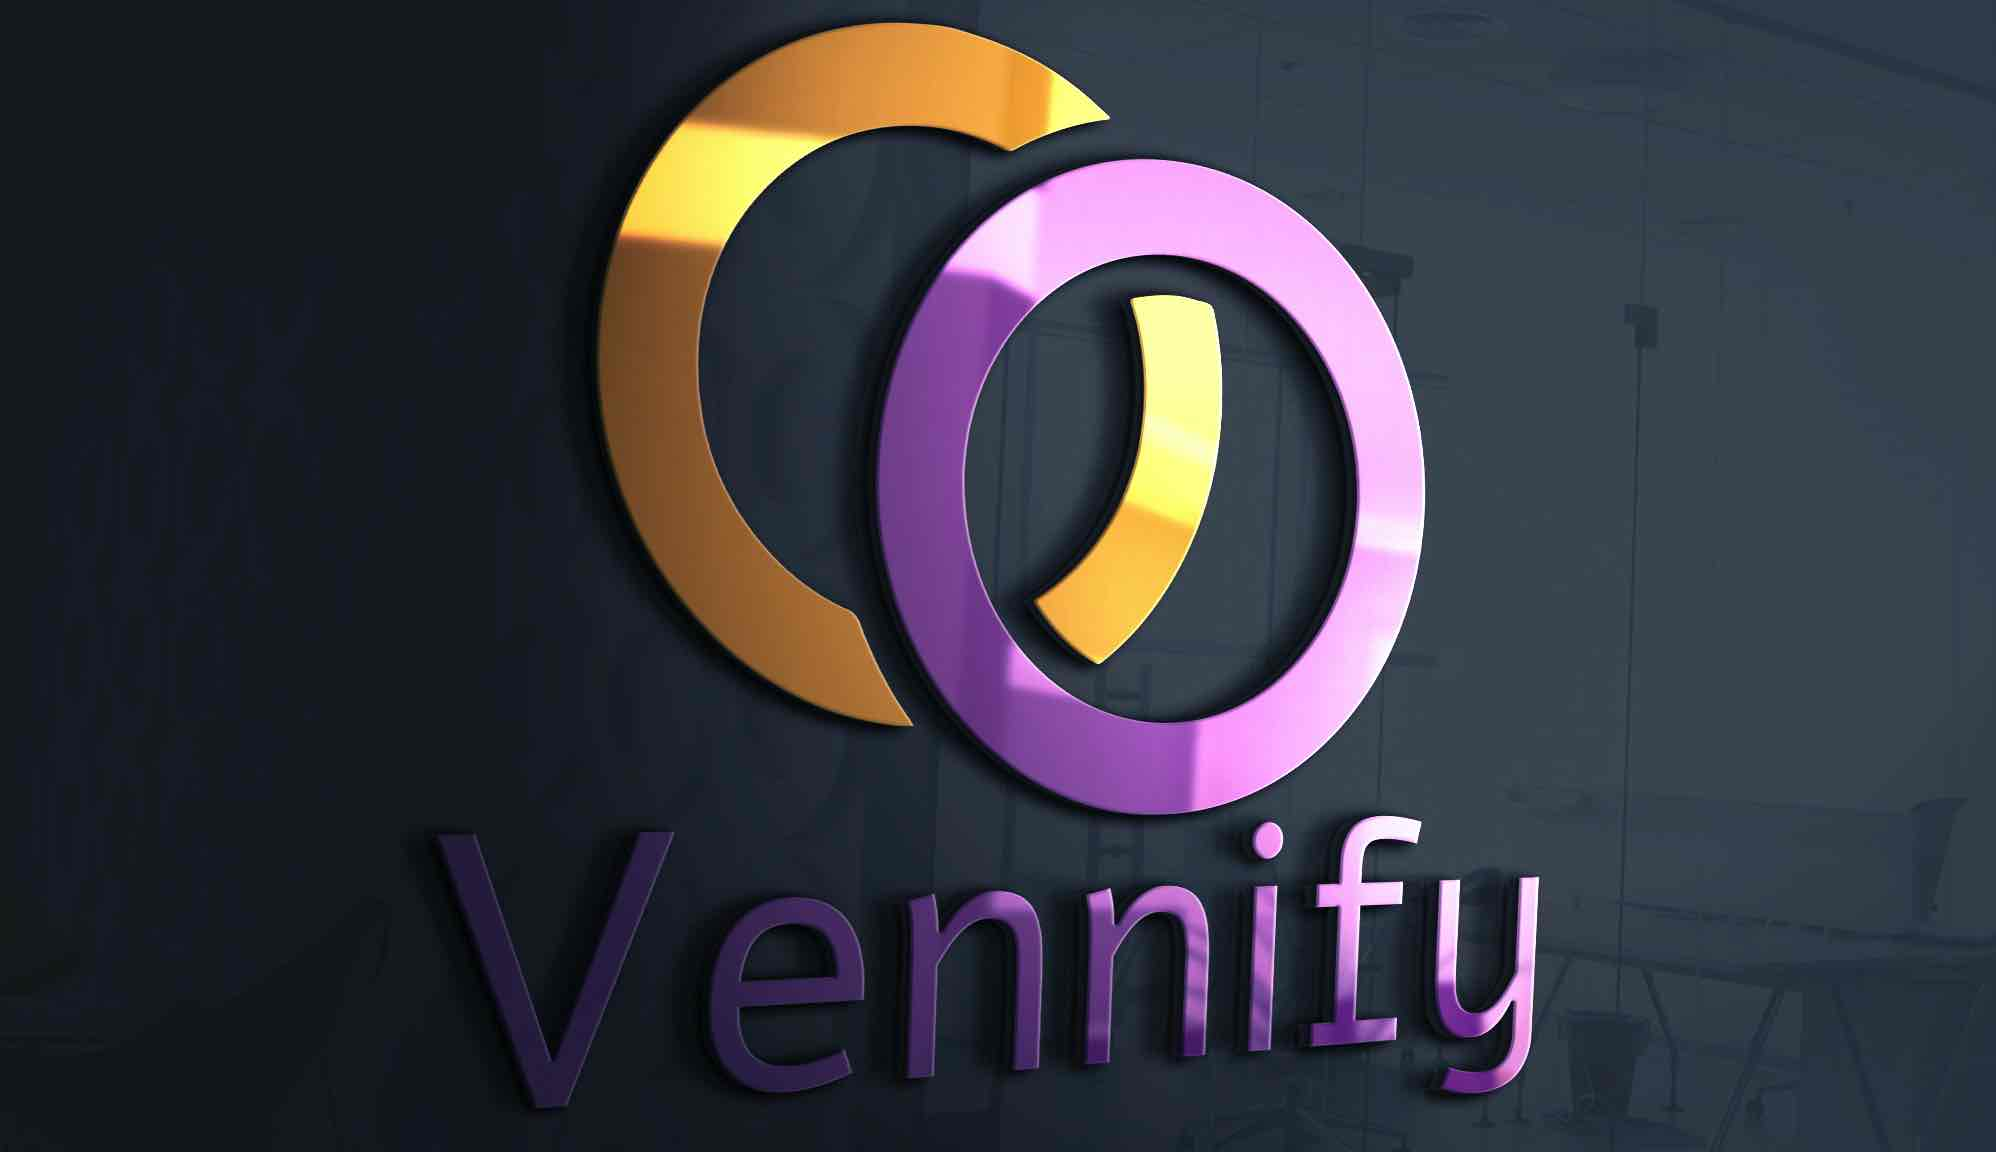

By [Eric Fillion ](https://www.linkedin.com/in/ericfillion/) @ [Vennify.ai](https://www.vennify.ai/)


Article: https://www.vennify.ai/how-to-use-styleformer/

## Install

https://github.com/PrithivirajDamodaran/Styleformer

In [ ]:
pip install git+https://github.com/PrithivirajDamodaran/Styleformer.git


  Cloning https://github.com/PrithivirajDamodaran/Styleformer.git to /tmp/pip-req-build-e7ud8qb5
  Running command git clone -q https://github.com/PrithivirajDamodaran/Styleformer.git /tmp/pip-req-build-e7ud8qb5


In [ ]:
from styleformer import Styleformer

## Casual To Formal

In [ ]:
styleformer_c_t_f = Styleformer(style=0)


Casual to Formal model loaded...


In [ ]:
result_1 = styleformer_c_t_f.transfer("Yo, I love coding in Python.")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  FutureWarning,


In [ ]:
print(result_1)

Yes, I enjoy programming in Python.


## Formal To Casual

In [ ]:
styleformer_f_t_c = Styleformer(style=1)


Formal to Casual model loaded...


In [ ]:
result_2 = styleformer_f_t_c.transfer("Let's discuss our plans for this evening", inference_on=1)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  FutureWarning,


In [ ]:
print(result_2)

So what are we going to do tonight?


## Multiple Sentences

Quick TextBlob tutorial: https://youtu.be/QsW9jdXvA3E

Full course: https://www.udemy.com/course/textblob-nlp/?couponCode=TEXTBLOB

In [ ]:
pip install textblob


In [ ]:
from textblob import TextBlob


In [ ]:
text = "Hey man, what's up? We should hang out and watch the Olympics. Then maybe go grab some food"

blob = TextBlob(text)


In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
result_4_list = []

for sent in blob.sentences:
  temp_result = styleformer_c_t_f.transfer(sent.string)
  result_4_list.append(temp_result)
  
result_4 = " ".join(result_4_list)
print(result_4)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  FutureWarning,


Hello, what is going on? We should spend time together watching the Olympics. Perhaps I should get some food.


# Styleformer With Happy Transformer 

https://github.com/EricFillion/happy-transformer

GitHub Gist: https://gist.github.com/EricFillion/7752b6584591935edb8cfcbad8c2b9ed

In [ ]:
pip install happytransformer

In [ ]:
from happytransformer import HappyTextToText

## Casual to  Formal

In [ ]:
happy_c_t_f = HappyTextToText("T5", "prithivida/informal_to_formal_styletransfer")

08/02/2021 21:16:15 - INFO - happytransformer.happy_transformer -   Using model: cuda


In [ ]:
from happytransformer import TTSettings

In [ ]:
top_k_sampling_settings = TTSettings(do_sample=True, top_k=20, temperature=0.5, min_length=1, max_length=100)

In [ ]:
prefix_c_t_f = "transfer Casual to Formal: "

In [ ]:
text_c_t_f = "I wanna play chess with you as we watch TV"

In [ ]:
input_c_t_f = prefix_c_t_f + text_c_t_f

In [ ]:
result_c_t_f = happy_c_t_f.generate_text(input_c_t_f, args=top_k_sampling_settings)

In [ ]:
print(result_c_t_f.text)

I would like to play chess with you while we watch television.


## Formal to Casual

In [ ]:
happy_f_t_c = HappyTextToText("T5", "prithivida/formal_to_informal_styletransfer")

08/02/2021 21:17:53 - INFO - happytransformer.happy_transformer -   Using model: cuda


In [ ]:
prefix_f_t_c = "transfer Formal to Casual: "

In [ ]:
text_f_t_c = "Shall we have dinner this evening downtown?"

In [ ]:
input_f_t_c = prefix_f_t_c + text_f_t_c

In [ ]:
result_f_t_c = happy_f_t_c.generate_text(input_f_t_c, args=top_k_sampling_settings)

In [ ]:
print(result_f_t_c.text)

Have dinner downtown tonight?
